In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline

# Primera aproximación: Comparar las regresiones de sólo hombres y sólo mujeres

In [2]:
def calc_lasso(X_train, Y_train,X_test, Y_test,alph):
    clf = linear_model.Lasso(alpha=alph)
    clf.fit(X_train, Y_train)
    r_test=clf.score(X_test, Y_test)
    r_train=clf.score(X_train, Y_train)
    return {'intercepto':clf.intercept_, 'coefs':clf.coef_, 'R_test':r_test,'R_train':r_train}

In [3]:
def get_regressions(gender, Norm, start, stop):
    data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)
    data = data[data['Gender'].values==gender]
    X=data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
    Y=data['Balance']
    
    #-----------------------------------------__
    quantity=20
    alphas=np.logspace(start,stop,num=quantity)
    results = np.zeros([quantity,9])

    if Norm==1:
        scalerx = preprocessing.StandardScaler().fit(X)
        X=scalerx.transform(X)
        devstd=np.std(Y)
        Y=Y-np.mean(Y)
        Y=Y/(devstd)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
    i=0
    for al in alphas:
        res = calc_lasso(X_train, Y_train,X_test, Y_test,al)
        results[i,0] = res['intercepto']
        results[i,1:7] = res['coefs']
        results[i,7] = res['R_test']
        results[i,8] = res['R_train']
        i+=1
    return alphas,results

In [4]:
#Cálculo independiente de regresiones. 207 Female vs 193 Male
start=-3.0
stop=2.0

alphas,results_h = get_regressions(' Male',1,start,stop)
alphas,results_m = get_regressions('Female',1,start,stop)

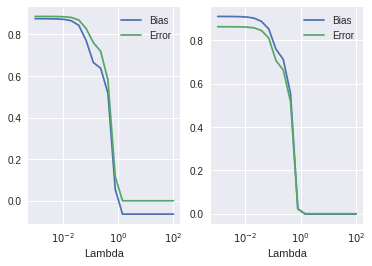

In [5]:
fig = plt.figure()
fig.add_subplot(121)
plt.semilogx(alphas,results_h[:,7],label='Bias')
plt.semilogx(alphas,results_h[:,8],label='Error')
plt.xlabel('Lambda')
plt.legend()

fig.add_subplot(122)
plt.semilogx(alphas,results_m[:,7],label='Bias')
plt.semilogx(alphas,results_m[:,8],label='Error')
plt.xlabel('Lambda')
plt.legend()

## Un primer análisis fue comparar el  $R^2$ al separar los datos por género. Si bien las gráficas no son exactamente iguales, para la cantidad de datos (400: 207 mujeres y 193 hombres) se puede decir que la tendencia es similar al realizar la regresión. La verdadera diferencia se apreciará en los $\beta$'s

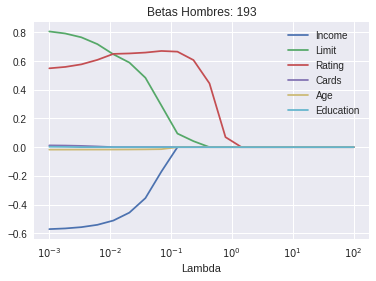

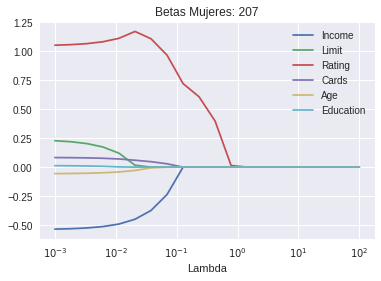

In [6]:
fig = plt.figure()
plt.semilogx(alphas,results_h[:,1:7])
plt.legend(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education'])
plt.title('Betas Hombres: 193')
plt.xlabel('Lambda')


fig = plt.figure()
plt.semilogx(alphas,results_m[:,1:7])
plt.legend(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education'])
plt.title('Betas Mujeres: 207')
plt.xlabel('Lambda')

### Analizando visualmente los coeficientes de la regresión podemos ver que inicialmente (mínimos cuadrados) para los hombres tiene una mayor importancia el límite de la cuenta, los ingresos y la calificación (rating), mientras que los demás valores están cercanos a cero. 

### Por el contrario, para las mujeres, si bien las variables que inicialmente influyen más son la calificación y los ingresos, las demás variables inician en valores más distantes de cero que para los hombres.

### Se puede revisar las matrices de correlación de los coeficientes donde 0 - Income, 1 - Limit, 2 - Rating, 3 - Cards, 4 - Age, 5 - Education

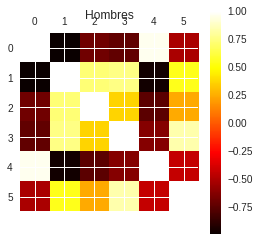

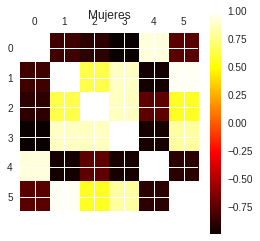

In [45]:
plt.matshow(np.corrcoef(np.transpose(results_h[:,1:7])),vmax=1,cmap='hot')
plt.title('Hombres')
plt.colorbar()
plt.matshow(np.corrcoef(np.transpose(results_m[:,1:7])),vmax=1,cmap='hot')
plt.title('Mujeres')
plt.colorbar()

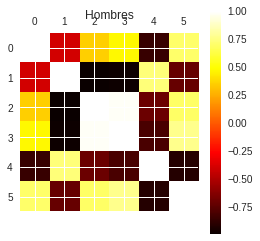

In [50]:
plt.matshow(np.corrcoef(np.transpose(results_h[:,1:7]-results_m[:,1:7])),vmax=1.0,cmap='hot')
plt.title('Hombres')
plt.colorbar()

### La variación de los coeficientes para ambos casos es similar, y a pesar de que los coeficientes cambian, la manera en que cambian a medida que varío mi lambda es similar.